In [8]:
from simpful import *
# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()
# Define fuzzy sets and linguistic variables
S_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="poor")
S_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="good")
S_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="excellent")
LV1 = LinguisticVariable([S_1, S_2, S_3], concept="Service quality", universe_of_discourse=[0,10])
FS.add_linguistic_variable("Service", LV1)

F_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="rancid")
F_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=10), term="delicious")
LV2 = LinguisticVariable([F_1, F_2], concept="Food quality", universe_of_discourse=[0,10])
FS.add_linguistic_variable("Food", LV2)
# Define output fuzzy sets and linguistic variable
T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="small")
T_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=20), term="average")
T_3 = FuzzySet(function=Trapezoidal_MF(a=10, b=20, c=25, d=25), term="generous")
LV3 = LinguisticVariable([T_1, T_2, T_3], universe_of_discourse=[0,25])
FS.add_linguistic_variable("Tip", LV3)
# Define fuzzy rules
R1 = "IF (Service IS poor) OR (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS.add_rules([R1, R2, R3])



  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful



In [9]:
test_cases = [
    {"Service": 4, "Food": 8},
    {"Service": 2, "Food": 5},
    {"Service": 7, "Food": 9},
    {"Service": 1, "Food": 9},
    {"Service": 1, "Food": 1}
]

# Wykonaj inferencję i wyświetl wyniki dla każdego zestawu danych wejściowych
for i, test_case in enumerate(test_cases):
    # Ustaw wartości antecedentów
    FS.set_variable("Service", test_case["Service"])
    FS.set_variable("Food", test_case["Food"])
    
    # Wykonaj inferencję Mamdaniego
    tip_value = FS.Mamdani_inference(["Tip"])["Tip"]
    
    # Wyświetl wyniki
    print(f"Test Case {i+1}:")
    print(f"Service: {test_case['Service']}, Food: {test_case['Food']}, Tip: {tip_value}")
    print()

Test Case 1:
Service: 4, Food: 8, Tip: 14.17223614042091

Test Case 2:
Service: 2, Food: 5, Tip: 12.303212936225501

Test Case 3:
Service: 7, Food: 9, Tip: 14.948782738022711

Test Case 4:
Service: 1, Food: 9, Tip: 13.932999705301384

Test Case 5:
Service: 1, Food: 1, Tip: 7.575966263028595



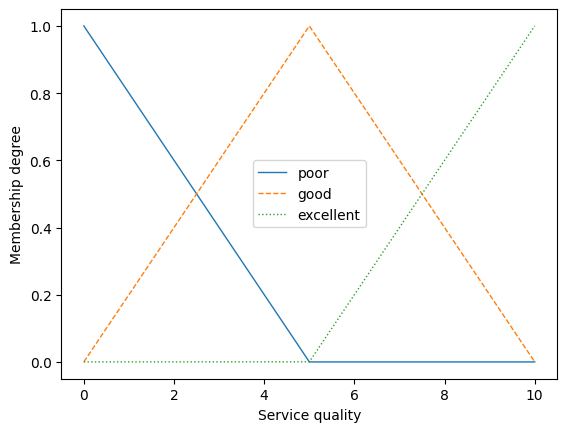

In [10]:
LV1.plot()

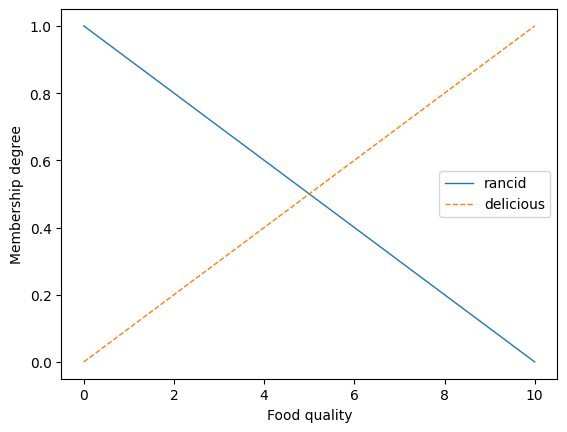

In [11]:
LV2.plot()

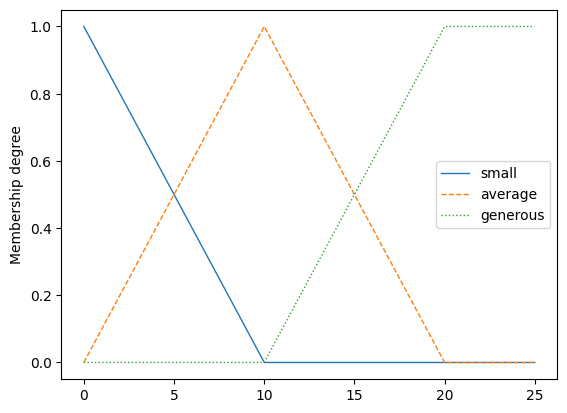

In [12]:
LV3.plot()